# Recognition of handwritten digit: A neural network approach

Handwritten digit recognition is a good first-lesson on image recognition for beginners.
<br />  
The MNIST dataset consists 60000 training examples and 10000 test examples, of digits 0-9, can be downloaded from [Yann Lecun's website](http://yann.lecun.com/exdb/mnist/).
<br />  
In this project we will:

- Implement a 2-layer neural network.
- Compute the forward pass and backward pass with svm loss.
- Use the batch normlizaiton to help network converge.
- Use the dropout method to avoid overfitting.
- Use a stochastic gradient descent with momentum to optimize the loss function.

In [1]:
from data_utils import loadMNIST

from __future__ import print_function
from two_layer_net import *

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Load the data
Load the MNIST data to train a neural network. The data is located at `'dataset/'` directory, you should download the 4 ubyte files from [Yann Lecun's website](http://yann.lecun.com/exdb/mnist/) and unextract it in the right directory before loading. Dataset directory may vary when you change the location of you project folder, or use a different operating system. Make sure to modify `data_utils.py` when you change the dataset location.

In [2]:
X_train, y_train = loadMNIST(dataset="training", num_image=60000)
X_test, y_test = loadMNIST(dataset="test", num_image=10000)

print("Loaded training images of shape:", X_train.shape)
print("Loaded training labels of shape:", y_train.shape)
print("Loaded test images of shape", X_test.shape)
print("Loaded test labels of shape", y_test.shape)

Loaded training images of shape: (60000, 28, 28)
Loaded training labels of shape: (60000,)
Loaded test images of shape (10000, 28, 28)
Loaded test labels of shape (10000,)


# Show some random images
Show some random images to get a gut feeling of how the data looks like.
Make sure `row * col` is less than the size of training set example number.
To adjust the size of plot size, just modify: `plt.rcParams['figure.figsize']` on the first code block.

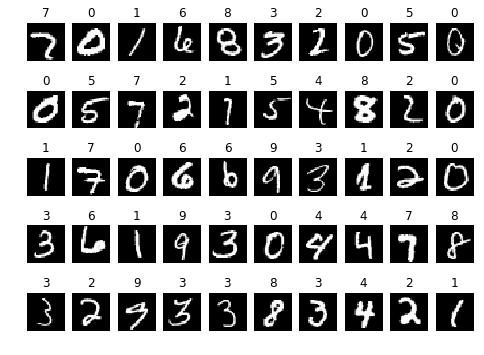

In [3]:
row, col = 5, 10
idx = np.random.choice(X_train.shape[0], row*col, replace=False)
for i in range(row):
    for j in range(col):
        plt_idx = idx[i*col+j]
        plt.subplot(row, col, i*col+j+1)
        plt.title(y_train[plt_idx])
        plt.imshow(X_train[plt_idx,:,:])
        plt.axis('off')

plt.show()

# Preprocess the data
## Part.1
In this part, we preprocess the data by:

- Split training set data to train and validation.
- Normalize the data

In [4]:
X_train, y_train = loadMNIST(dataset="training", num_image=60000)
X_test, y_test = loadMNIST(dataset="test", num_image=10000)

# Split the data into train, val, and test sets. 
num_training = 50000
num_validation = 10000
num_test = 10000

# Our validation set will be num_validation points from the original
# training set.
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

# Our training set will be the first num_train points from the original
# training set.
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

# We use the first num_test points of the original test set as our
# test set.
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]


# Normalize the data: subtract the mean image
mean_image = np.mean(X_train, axis=0)
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image


print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (50000, 28, 28)
Train labels shape:  (50000,)
Validation data shape:  (10000, 28, 28)
Validation labels shape:  (10000,)
Test data shape:  (10000, 28, 28)
Test labels shape:  (10000,)


## Part.2
Reshape the 3 dimension data to a `[N * (row * col)]` 2 dimension matrix.
`N` is the number of examples, `(row, col)` is the shape of an example image.

In [5]:
# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

# As a sanity check, print out the shapes of the data
print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)

Training data shape:  (50000, 784)
Validation data shape:  (10000, 784)
Test data shape:  (10000, 784)


# Training
Train a two layer neural network, update gradients with mini-batch data, optimize the loss with SGD.

__*TODO: modify SGD with other optimize method such as SGD+Momentum to faster converge loss.*__

__*TODO: Try batch normalization and dropout to help converge and avoid overfitting.*__

In [6]:
input_size = 28 * 28
hidden_size = 200
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=12000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.99,
            reg=0.5, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
train_acc = (net.predict(X_train) == y_train).mean()
print('Validation accuracy: ', val_acc)
print('Train accuracy: ', train_acc)

iteration 0 / 12000: loss 9.000520 val_acc 0.167500
iteration 100 / 12000: loss 1.664820 val_acc 0.792800
iteration 200 / 12000: loss 0.664204 val_acc 0.884800
iteration 300 / 12000: loss 0.624298 val_acc 0.901700
iteration 400 / 12000: loss 0.587803 val_acc 0.910200
iteration 500 / 12000: loss 0.384876 val_acc 0.917100
iteration 600 / 12000: loss 0.460130 val_acc 0.921800
iteration 700 / 12000: loss 0.539227 val_acc 0.925300
iteration 800 / 12000: loss 0.233521 val_acc 0.927700
iteration 900 / 12000: loss 0.395391 val_acc 0.929600
iteration 1000 / 12000: loss 0.241742 val_acc 0.932000
iteration 1100 / 12000: loss 0.373523 val_acc 0.932000
iteration 1200 / 12000: loss 0.286683 val_acc 0.934300
iteration 1300 / 12000: loss 0.370390 val_acc 0.936900
iteration 1400 / 12000: loss 0.387822 val_acc 0.938400
iteration 1500 / 12000: loss 0.261420 val_acc 0.939300
iteration 1600 / 12000: loss 0.424795 val_acc 0.941600
iteration 1700 / 12000: loss 0.338844 val_acc 0.943400
iteration 1800 / 12000

# Debug the training
The loss history indicates whether loss is converging.
Overfitting or underfitting can be observed from classification accuracy history.
If there is a big gap between training accuracy and validation accuracy curves, the model is highly possible overfitting. Else if the training accuracy is low, and validation accuracy alike, the model might be underfitting.
To avoid such occasions, fine tune the parameters with your observation on the plots.

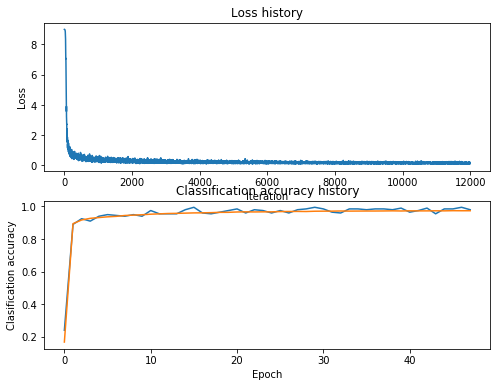

In [7]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

# Performance of the model
Now it's time to finally evaluate our model, with test set data.

In [8]:
test_acc = (net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.9714


# Show some random image and predict using our model

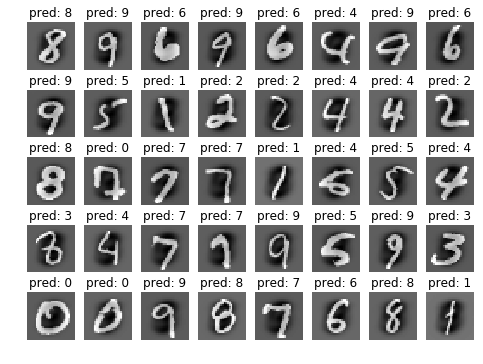

In [9]:
row, col = 5, 8
y_test_pred = net.predict(X_test)
X_test_image = X_test.reshape(-1, 28, 28)
idx = np.random.choice(X_test.shape[0], row*col, replace=False)
for i in range(row):
    for j in range(col):
        plt_idx = idx[i*col+j]
        plt.subplot(row, col, i*col+j+1)
        plt.title('pred: ' + str(y_test_pred[plt_idx]))
        plt.imshow(X_test_image[plt_idx,:,:])
        plt.axis('off')

plt.show()

# Acknowledgment
Some of the code and structure is copied from Stanford course [CS231n](https://cs231n.github.io) assignments. Lectured by Fei-Fei Li, Andrej Karpathy, Justion Johnson and Serena Yeung